# Analyzing wildfire activities in Australia** 



# Objectives

After completing this lab you will be able to:

 - Use visualization libraries such as Matplotlib, Pandas, Seaborn and Folium to create informative plots and charts 


### Importing Required Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

df = pd.read_csv(URL)
print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's look at some samples rows from the dataset we loaded:


In [3]:
df.head(5)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


---


Let's verify the column names and the data type of each variable


In [4]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [6]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


**Verify the columns again**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
 10  Year                                 26406 non-null  int32  
 11  Month                       

---


## Practice Tasks


### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


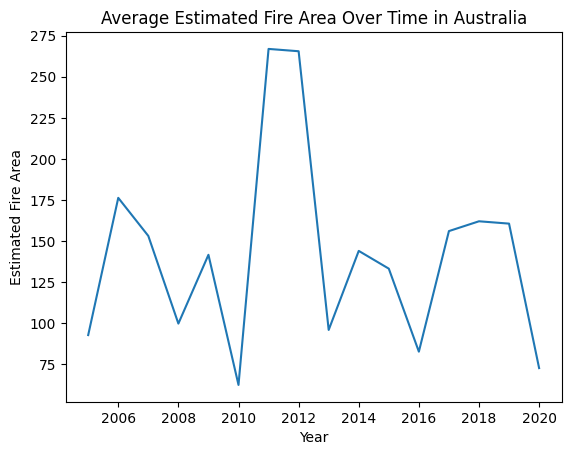

In [8]:
%matplotlib inline
fire_area_over_time = df.groupby('Year')['Estimated_fire_area'].mean()
fire_area_over_time.plot(x=fire_area_over_time.index,y=fire_area_over_time.values)
plt.title('Average Estimated Fire Area Over Time in Australia')
plt.xlabel('Year')
plt.ylabel('Estimated Fire Area')
plt.show()

---


### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


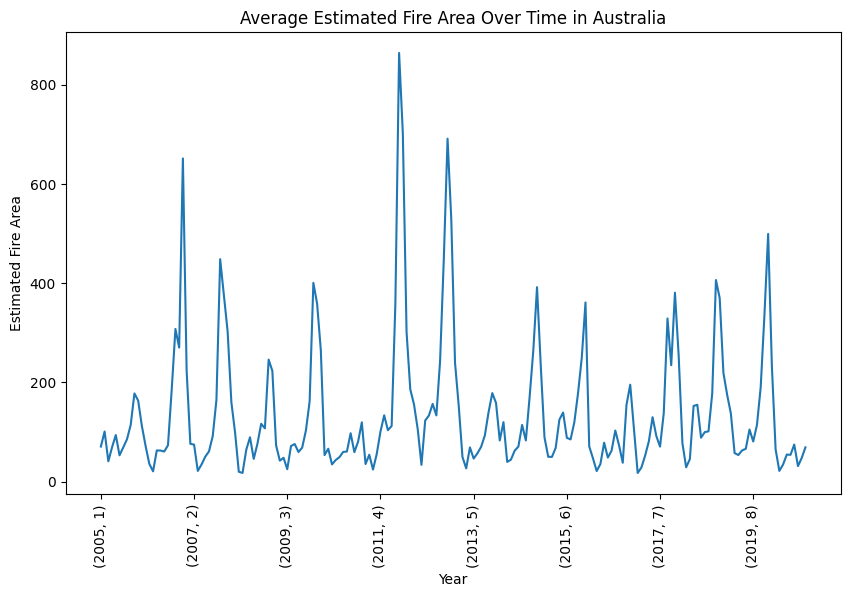

In [9]:
%matplotlib inline

fire_area_over_time = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
plt.figure(figsize=(10,6))
fire_area_over_time.plot(x=fire_area_over_time.index,y=fire_area_over_time.values)
plt.title('Average Estimated Fire Area Over Time in Australia')
plt.xlabel('Year')
plt.ylabel('Estimated Fire Area')
plt.xticks(rotation=90)
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


---


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot


before starting with the plot, why not know the regions mentioned in the dataset?. <br>Make use of unique() to identify the regions in the dataset (apply it on series only)


In [10]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

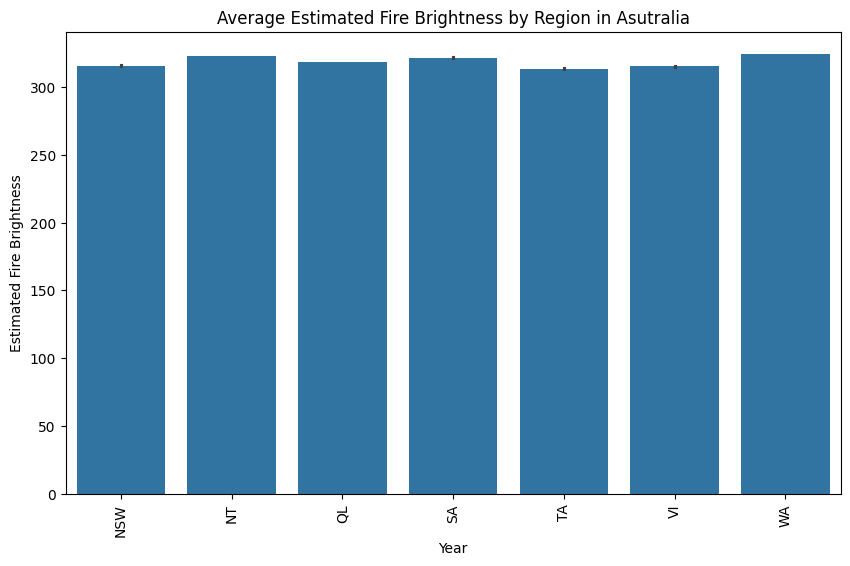

In [12]:
%matplotlib inline

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.title('Average Estimated Fire Brightness by Region in Asutralia')
plt.xlabel('Year')
plt.ylabel('Estimated Fire Brightness')
plt.xticks(rotation=90)
plt.show()

---


### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


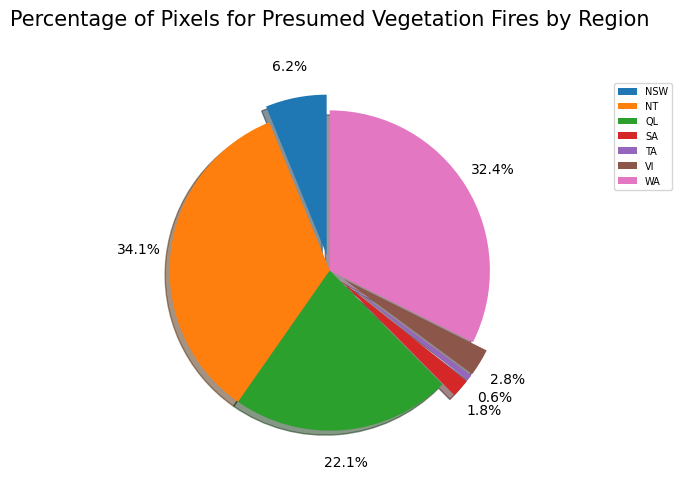

In [13]:
%matplotlib inline

explode_list=[0.1,0,0,0.1,0.1,0.1,0]
region_portion = df.groupby('Region')['Count'].sum()
plt.pie(region_portion, autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.2, explode=explode_list)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region', y=1.12, fontsize = 15) 
plt.axis('equal') 
plt.legend(labels=region_portion.index, loc='upper right', fontsize=7, bbox_to_anchor=(1.2, 1))
plt.show()


### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 

remove the autopct fromm pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`


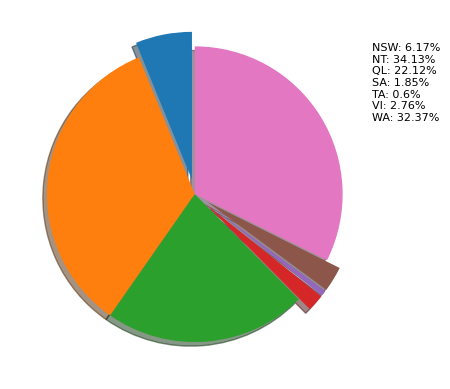

In [14]:
%matplotlib inline

explode_list=[0.1,0,0,0.1,0.1,0.1,0]
region_portion = df.groupby('Region')['Count'].sum()
plt.pie(region_portion, startangle=90, shadow=True, labels=None, pctdistance=1.12, explode=explode_list)
percentages = [(i, round(k / region_portion.sum() * 100, 2)) for i, k in zip(region_portion.index, region_portion)]
plt.text(1.2, 0.5, '\n'.join([f'{label}: {percent}%' for label, percent in percentages]), fontsize=8)
plt.show()


---


### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


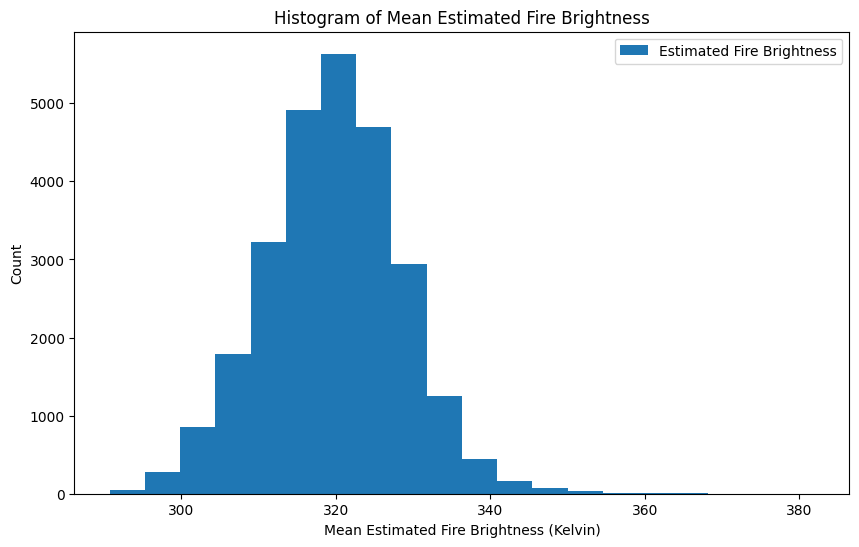

In [15]:
%matplotlib inline

plt.figure(figsize=(10,6))
plt.hist(x = df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.legend(['Estimated Fire Brightness'])
plt.show()

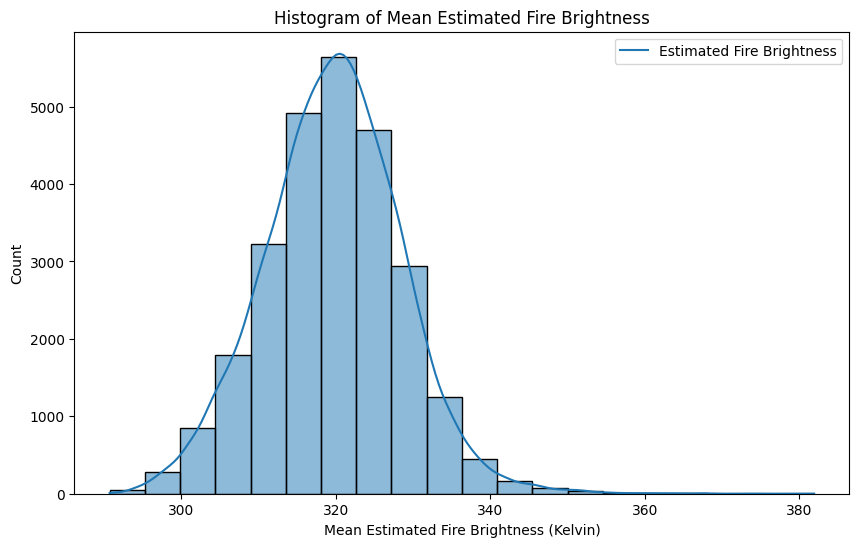

In [16]:
import seaborn
%matplotlib inline

plt.figure(figsize=(10,6))
sns.histplot(x = df['Mean_estimated_fire_brightness'], bins=20, kde=True)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.legend(['Estimated Fire Brightness'])
plt.show()

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


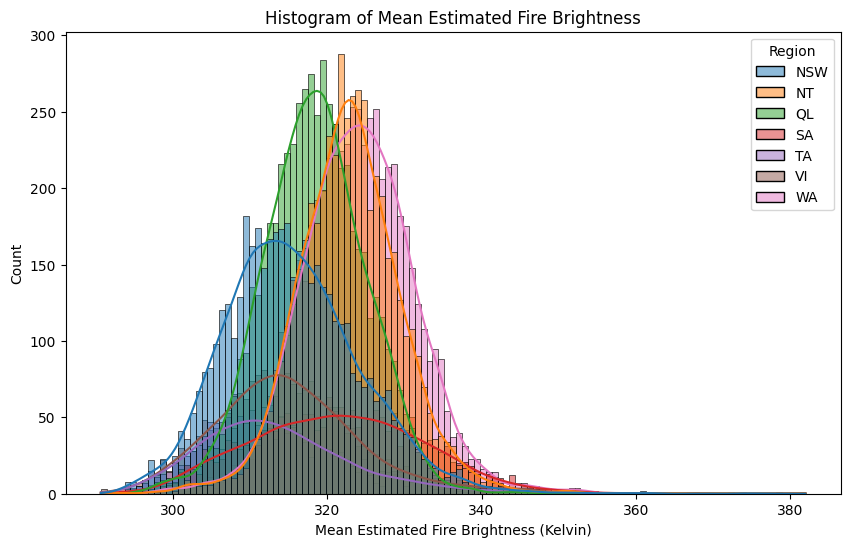

In [17]:
import seaborn
%matplotlib inline

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', kde=True, alpha=0.5, legend=True)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

### looks better!, now include the parameter `multiple='stack'` in the histplot() and see the difference. Include labels and titles as well


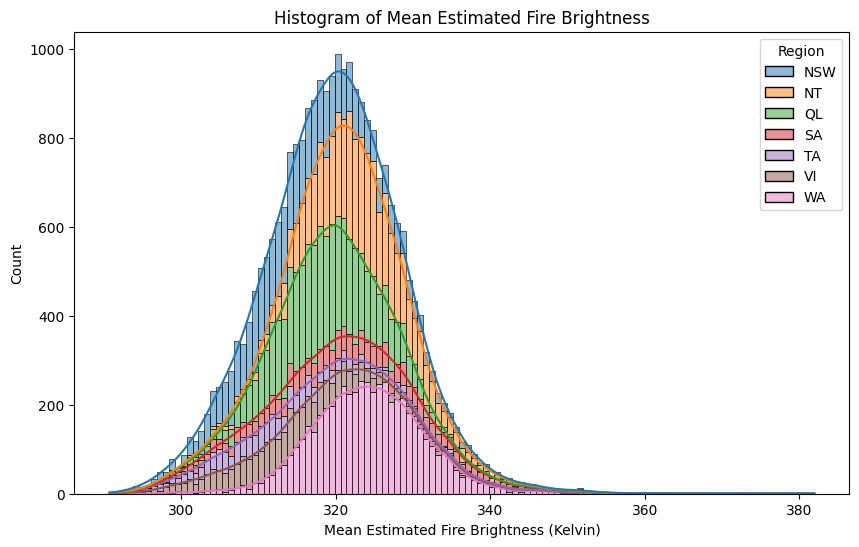

In [18]:
import seaborn
%matplotlib inline

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', kde=True, alpha=0.5, legend=True,multiple='stack')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

---


### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


In [19]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

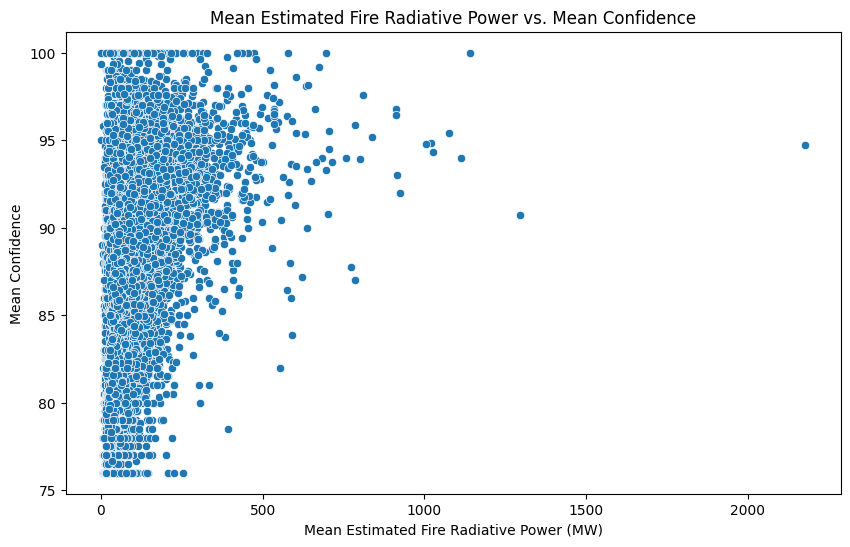

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x = 'Mean_estimated_fire_radiative_power', y = 'Mean_confidence')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

---


### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [22]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [68]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)

---

Copyright © 2024 CAHL Analytics.